In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source
from datetime import datetime
%matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Import the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_final313.csv")
display(df.head())
display(df.shape)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,interest_payment_cat,loan_condition,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,5000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,1,Good Loan,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,2500,60 months,2,INDIVIDUAL,1,car,2,High,2,Bad Loan,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,2400,36 months,1,INDIVIDUAL,1,small_business,3,High,2,Good Loan,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,10000,36 months,1,INDIVIDUAL,1,other,4,High,2,Good Loan,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,3000,60 months,2,INDIVIDUAL,1,other,4,Low,1,Good Loan,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


(887379, 30)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Choose 10 major features
df0 = df.iloc[:, [8, 4, 21, 10, 12, 20, 6, 16, 18, 23]]
display(df0.head())

# Independent features X 
X1 = df0.iloc[:, :-1]
# Response feature y
y1 = df0.iloc[:, -1]

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat,grade_cat
0,24000,10.0,10.65,5000,1,0,1,1,1,2
1,30000,0.5,15.27,2500,2,1,1,2,2,3
2,12252,10.0,15.96,2400,1,0,1,3,2,3
3,49200,10.0,13.49,10000,1,0,1,4,2,3
4,80000,1.0,12.69,3000,2,0,1,4,1,2


In [5]:
# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1,random_state=0, test_size=0.1)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
# Fit the decision tree classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [6]:
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9456489891590976


# Section 5.2.1 - Different "Max depth"

In [7]:
# Prediction rate over various max_depth
k_range = range(1, 21)
rate = []
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1,random_state=0, test_size=0.1)

start = datetime.now()
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rate.append(round(metrics.accuracy_score(y_test, y_pred), 3))
print(datetime.now()-start)
print(rate)

0:00:52.730084
[0.511, 0.771, 0.816, 0.866, 0.883, 0.909, 0.923, 0.94, 0.944, 0.949, 0.952, 0.955, 0.957, 0.957, 0.958, 0.958, 0.958, 0.957, 0.957, 0.956]


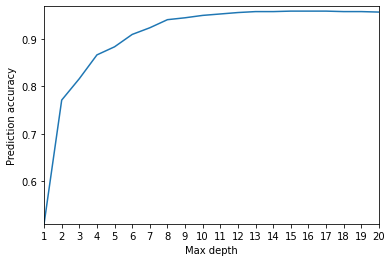

In [8]:
# Plot
plt.plot(k_range, rate)
plt.axis([1,20, min(rate), max(rate)+0.01])
plt.xticks(k_range)
plt.xlabel('Max depth')
plt.ylabel('Prediction accuracy')
plt.savefig('accr_max_depth')

* Setting max depth as 15 in the following examples.

# Section 5.2.2 - Different "criterion"

In [9]:
# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0, test_size=0.1)
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=15, random_state=0)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9578196488539296


In [10]:
# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0, test_size=0.1)
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=15, random_state=0, criterion="entropy")
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.955701052536681


# Section 5.2.3 - Different  "min samples split"

In [11]:
# Prediction rate over various min_samples_split
k_range = range(2, 21)
rate = []
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0, test_size=0.1)

start = datetime.now()
for k in k_range:
    clf = DecisionTreeClassifier( min_samples_split=k, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rate.append(round(metrics.accuracy_score(y_test, y_pred), 3))
print(datetime.now()-start)

print(rate)

0:01:08.712075
[0.946, 0.946, 0.946, 0.946, 0.947, 0.947, 0.948, 0.948, 0.949, 0.948, 0.949, 0.949, 0.95, 0.95, 0.95, 0.95, 0.95, 0.951, 0.951]


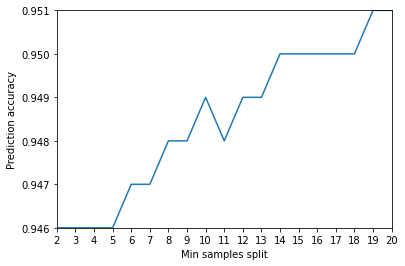

In [12]:
# Plot
plt.plot(k_range, rate)
plt.axis([2, 20, min(rate), max(rate)])
plt.xticks(k_range)
plt.xlabel('Min samples split')
plt.ylabel('Prediction accuracy')
plt.savefig('min_samples_split')

# Section 5.2.4 - Random Forest

In [13]:
start=datetime.now()
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=0)
forest = RandomForestClassifier(max_depth=15, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))
print (datetime.now()-start)

0.9252744032996011
0:02:48.155326


0:20:37.655541
[0.944, 0.945, 0.946, 0.946, 0.946, 0.947, 0.946, 0.946, 0.946]


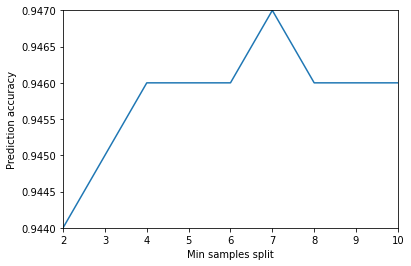

In [14]:
# Prediction rate over various min_samples_split
k_range = range(2, 11)
rate = []
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0, test_size=0.1)

start = datetime.now()
for k in k_range:
    clf = RandomForestClassifier( min_samples_split=k, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rate.append(round(metrics.accuracy_score(y_test, y_pred), 3))
print(datetime.now()-start)

print(rate)


# Plot
plt.plot(k_range, rate)
plt.axis([2, 10, min(rate), max(rate)])
plt.xticks(k_range)
plt.xlabel('Min samples split')
plt.ylabel('Prediction accuracy')
plt.savefig('min_samples_split')

# Sction 5.2.5 - Visualization

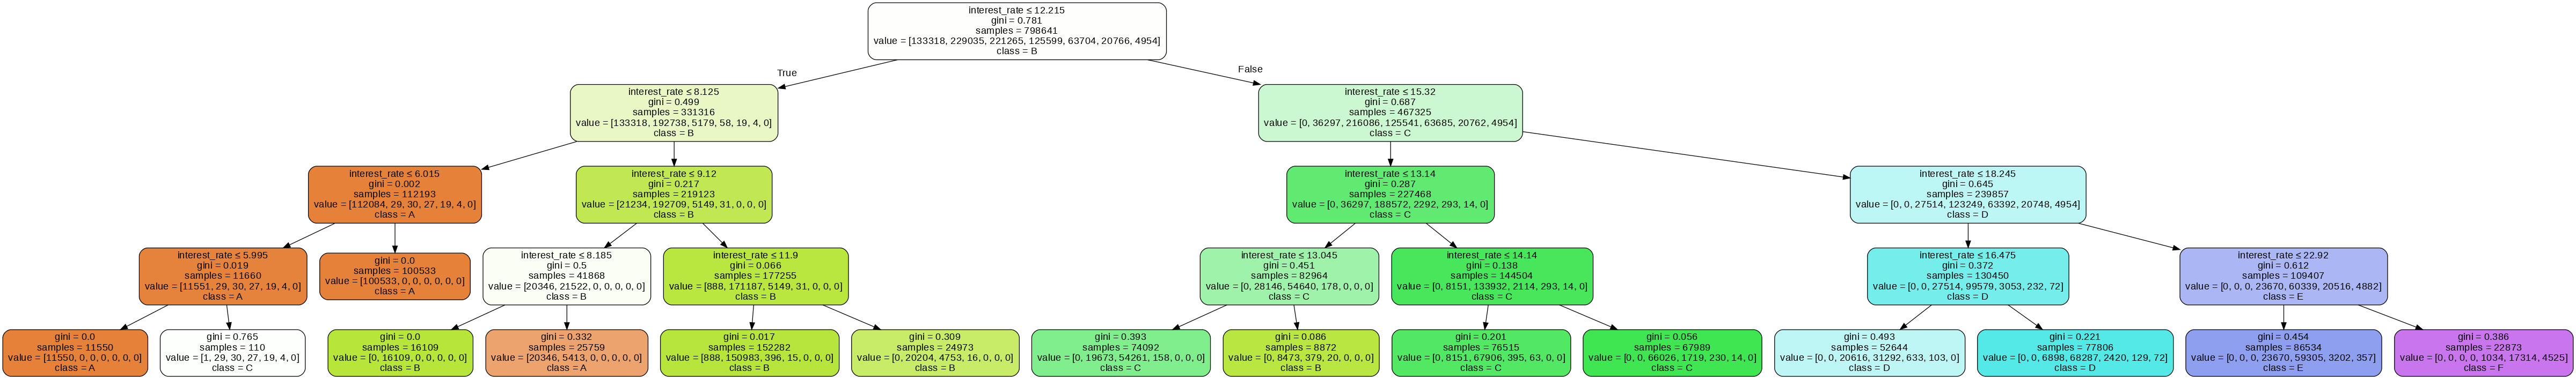

In [15]:
#Decision tree with max_length = 15 is still hard to visualize, to show how the model works, we set max_depth as 3 to hava a basic idea.

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
# Fit the decision tree classifer
clf.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1.columns, 
                class_names = (['A', 'B', 'C', 'D', 'E', 'F', 'G']))

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.set_size('"50,50!"')
graph.write_png('loan2.png')
Image(graph.create_png())

# Section 5.2.6 - Feature importance

In [16]:
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1,random_state=0, test_size=0.1)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
# Fit the decision tree classifer
clf.fit(X_train, y_train)

# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

# Show the importance of features
print(clf.feature_importances_)

0.9456489891590976
[0.02708382 0.01185032 0.92124317 0.02300357 0.00615619 0.00204948
 0.00340267 0.00521076 0.        ]


In [17]:
# Remove "interest rate"
X2 = X1.drop(['interest_rate'], axis=1)  

# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X2, y1, random_state=0)
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=15,random_state=0)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.4967928057878248
